## Подключение необходимых библиотек

In [1]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

import warnings

## Тестовый датафрейм "mpg"

In [ ]:
mpg

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       ...  
229  midsize  
230  midsize  
231  midsize  
232  midsize  
233  midsize  

[234 rows x 11 columns]

## Простейшая визуализация с использованиме geom_point по осям displ и hwy

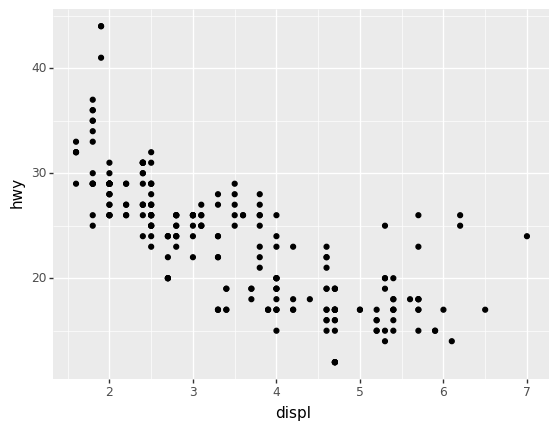

<ggplot: (98379388541)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"))

### Постройте два графика: в одном из них одна из осей должна быть соответствовать столбцу с элементами-категориями, во втором – обе (например, "class" и "drv")


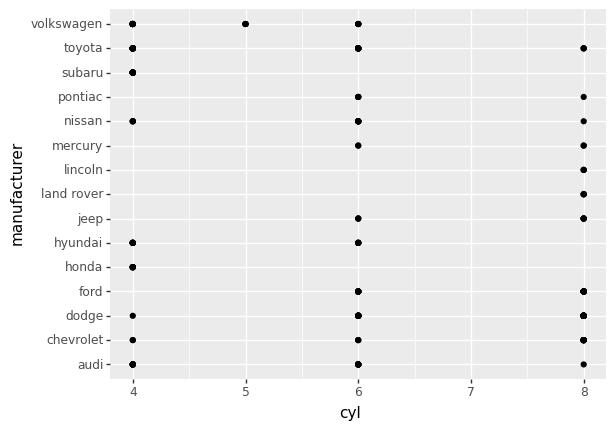

<ggplot: (98379759830)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="cyl", y="manufacturer"))

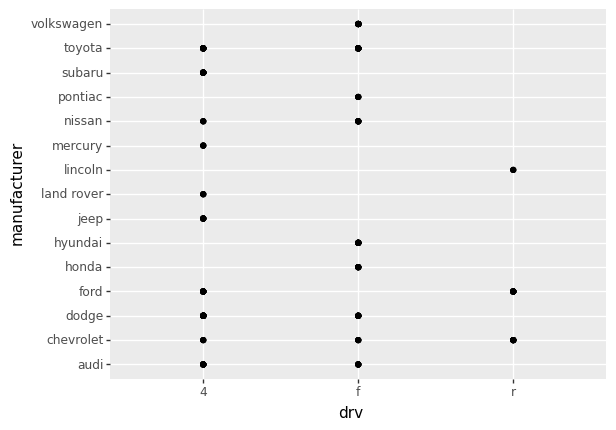

<ggplot: (98379966771)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="drv", y="manufacturer"))

## Добавим красок, оттенков и форм в графики

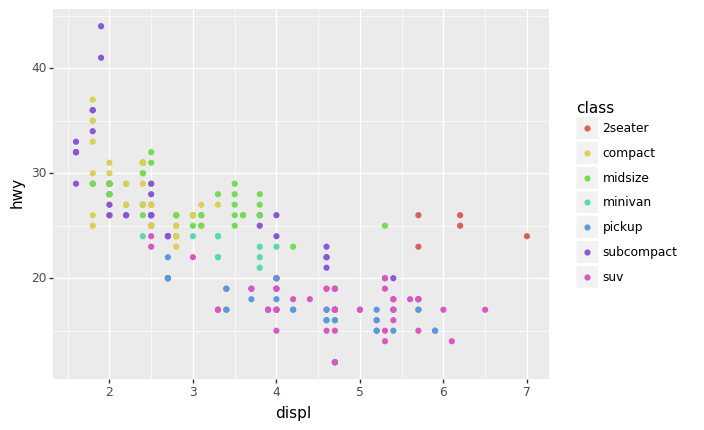

<ggplot: (-9223371871808279888)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", color="class"))

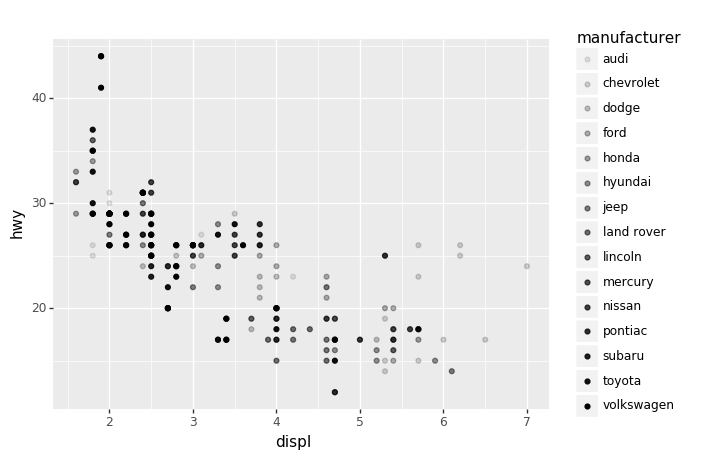

<ggplot: (-9223371871808766956)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", alpha="manufacturer"))

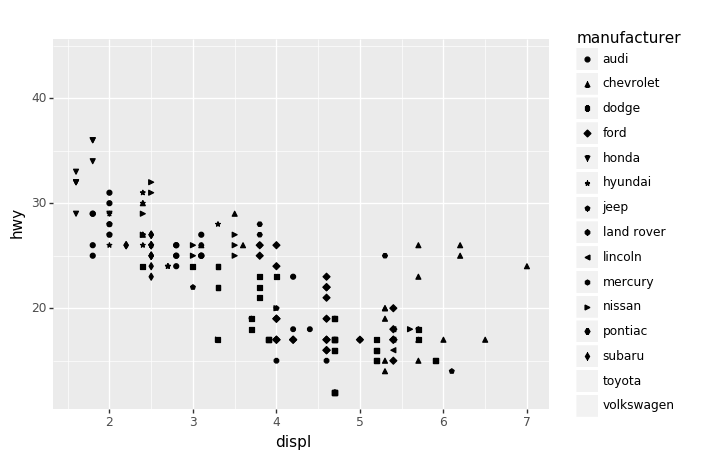

<ggplot: (-9223371871808170620)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", shape="manufacturer"))

### Попробуйте сделать два графика: в одном размер точек будет соответствовать столбцу с элементами-категориями, во втором – столбцу с элементами-значениями

C:\Users\Julia\AppData\Roaming\Python\Python310\site-packages\plotnine\scales\scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


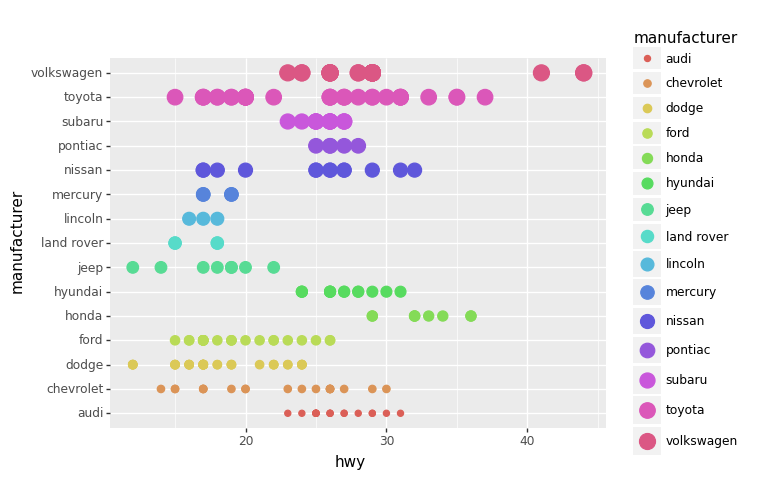

<ggplot: (98379388631)>

In [ ]:
# размер точек соответствует столбцу с элементами-категориями
ggplot(mpg) +\
geom_point(mapping = aes(x='hwy', y='manufacturer', color='manufacturer', size='manufacturer'))

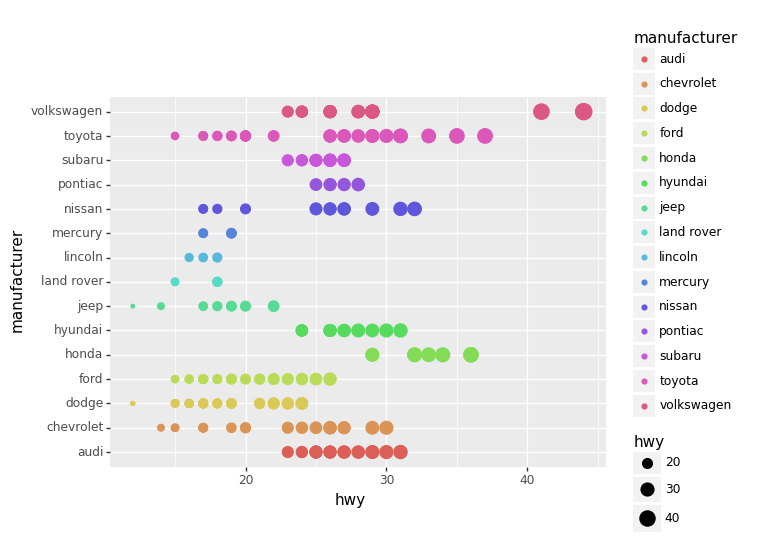

<ggplot: (98250169332)>

In [ ]:
# размер точек соответствует столбцу с элементами-значениями
ggplot(mpg) +\
geom_point(mapping = aes(x='hwy', y='manufacturer', color='manufacturer', size='hwy'))

## А что если сделать использовать в качестве источника визуального свойства "форма" непрерывную категорию (например hwy)?

In [ ]:
# Будет ошибка
ggplot(data=mpg) +\
geom_point(mapping=aes(x='cyl', y='manufacturer', shape="hwy"))

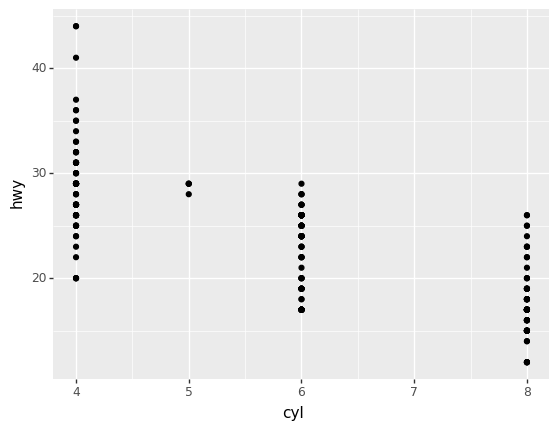

<ggplot: (98250175939)>

In [ ]:
ggplot(mpg) +\
geom_point(mapping = aes(x='cyl', y='hwy', scale_fill_manual = 'hwy'))

### Попробуйте сделать график с визуальным элементом, заданным условным оператором (например, color="displ < 5")

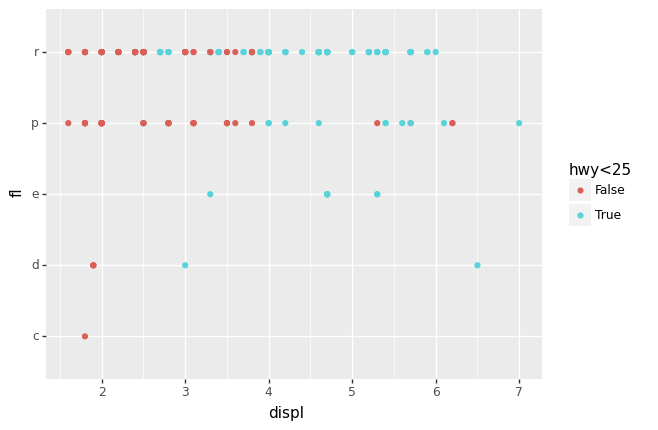

<ggplot: (98250186620)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="fl", color="hwy<25"))

### Попробуйте поэкспериментировать с графиками, где одной категории соответствуют различные визуальные элементы (пример ниже). Попробуйте привести пример, когда это имеет смысл.

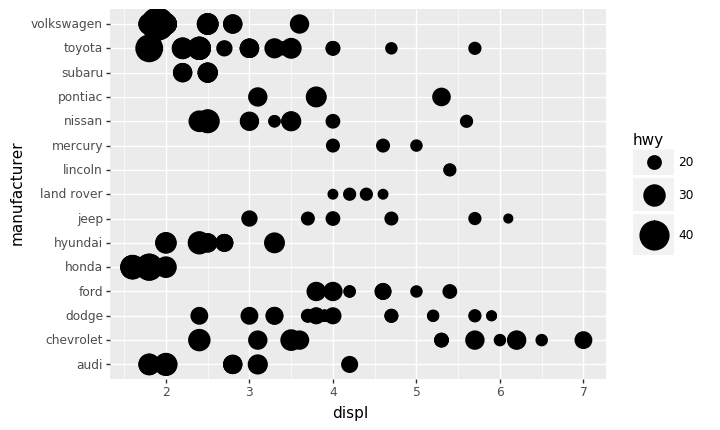

<ggplot: (-9223371871808028632)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="manufacturer", stroke="hwy"))

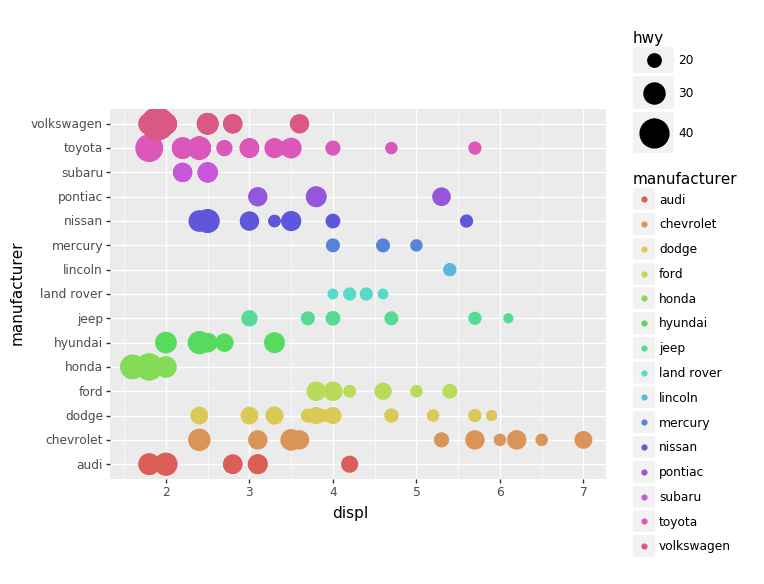

<ggplot: (-9223371871807959108)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="manufacturer", stroke="hwy", color="manufacturer"))

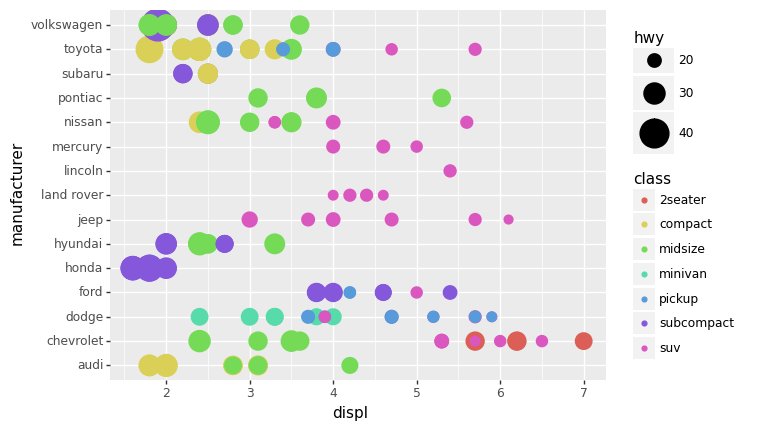

<ggplot: (98379784970)>

In [ ]:
# Например, размер зависит от числового параметра, а цвет - от категориального
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="manufacturer", stroke="hwy", color="class"))

## Использование панелей при визуализации

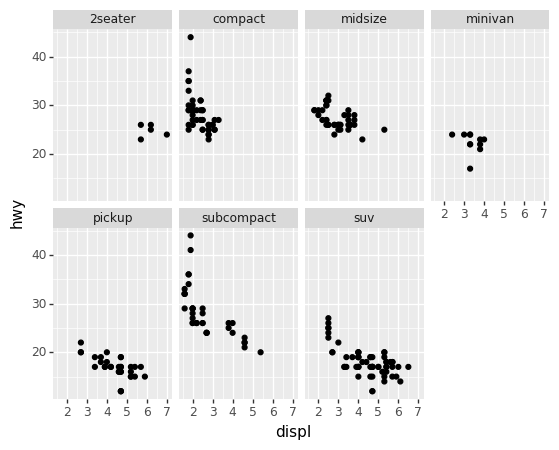

<ggplot: (-9223371871808784336)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
facet_wrap("class", nrow=2)

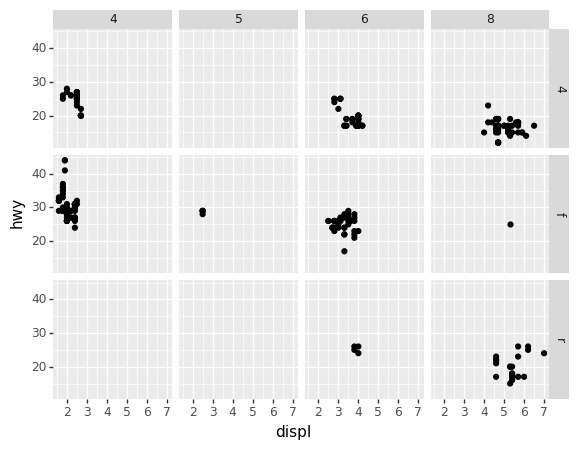

<ggplot: (-9223371871808092076)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
facet_grid("drv ~ cyl")

### Что если использовать категорию с непрерывными значениями (например, hwy) для разделения на панели?

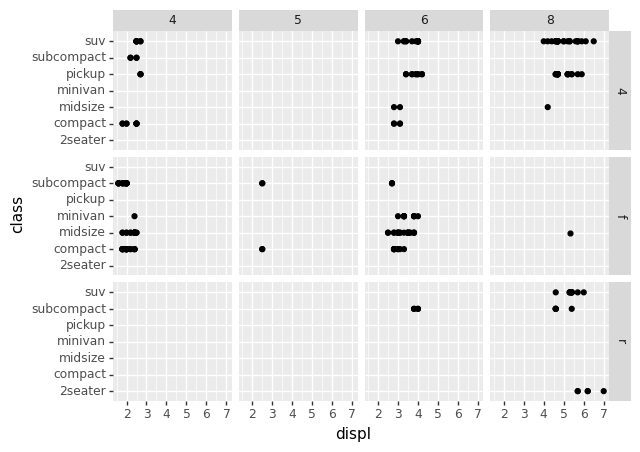

<ggplot: (98253656665)>

In [ ]:
ggplot(data=mpg) + \
geom_point(mapping=aes(x="displ", y="class")) + \
facet_grid("drv ~ cyl")

### Можно сделать только вертикальные или только горизонтальные панели, если использовать конструкцию типа (". ~ <категория>")

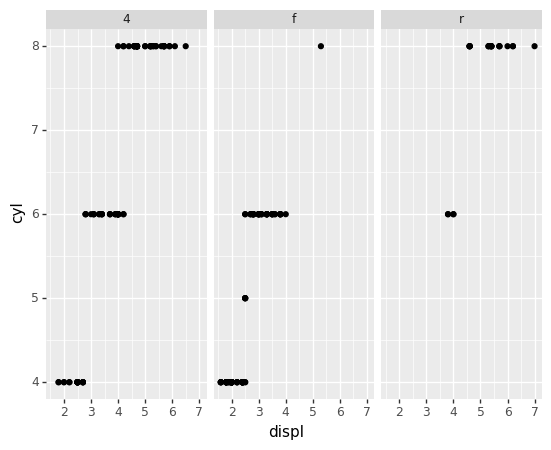

<ggplot: (98250207701)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="cyl")) +\
facet_grid(". ~ drv")

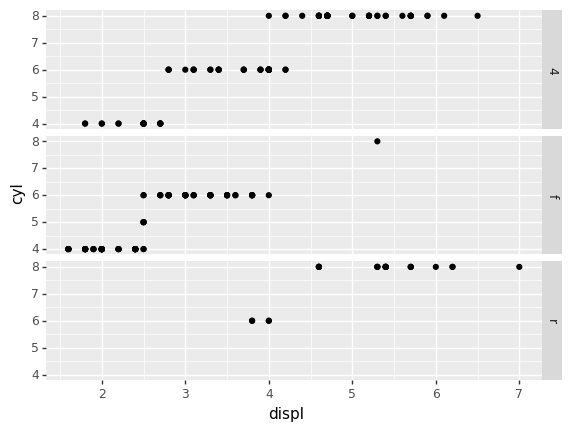

<ggplot: (98380335900)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="cyl")) +\
facet_grid("drv ~ .")

### Что лучше использовать: цвета или панели? А для большого набора?
**Ответ**: Мне кажется, что лучше использовать цвета, так как они интуитивно понятнее для восприятия, чем структура с несколькими осями. Этот вариант больше подойдет для первого взгляда на общую картину, а панели - для более подробного анализа. В том числе для большого набора данных, так как количество панелей может стать слишком большим.

## geom_smooth() позволяет получить сглаженную среднюю (в том числе, с доверительным интервалом).abs
### (это не сработает без библиотеки scikit-misc, и может не сработать даже с ней)

In [3]:
!pip install scikit-misc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 5.0 MB/s 


In [4]:
import skmisc

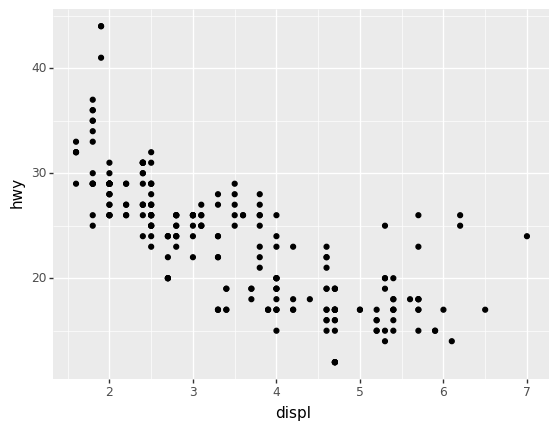

<ggplot: (8728702072058)>

In [5]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"))

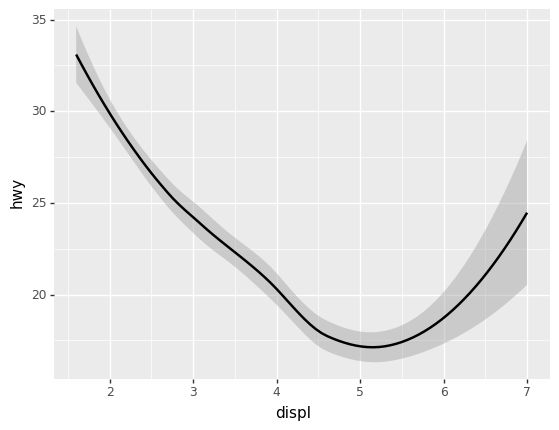

<ggplot: (8728650697831)>

In [6]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy"))

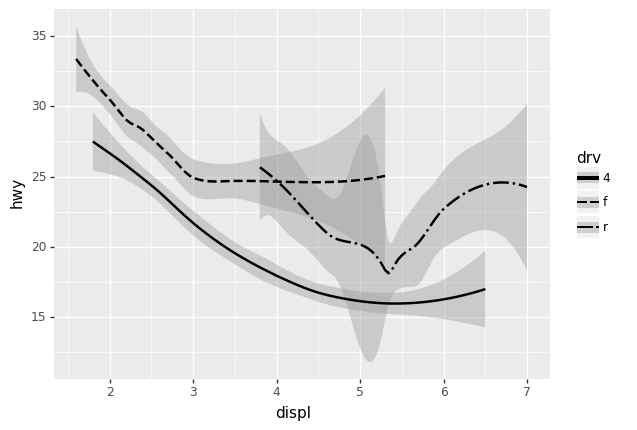

<ggplot: (8728646301733)>

In [7]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy", linetype="drv"))

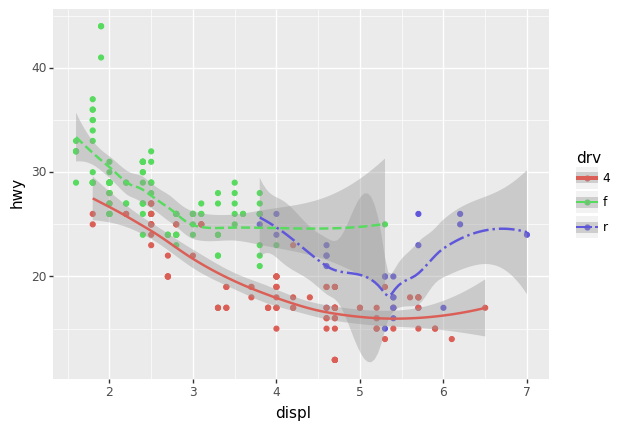

<ggplot: (8728646241416)>

In [8]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy", color="drv")) +\
geom_point() +\
geom_smooth(mapping=aes(linetype="drv"))

## Визуальные отображения в функции ggplot будут распространяться на все графики. Отдельные свойства каждого геометрического отображения будут относиться только к нему.

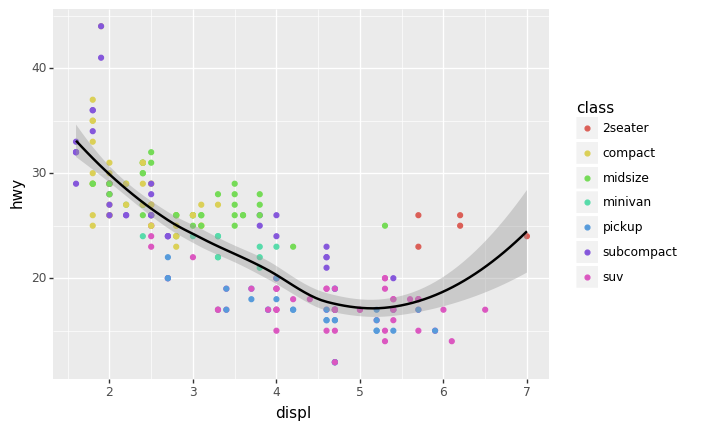

<ggplot: (-9223371871807386280)>

In [ ]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point(mapping=aes(color="class")) +\
geom_smooth()

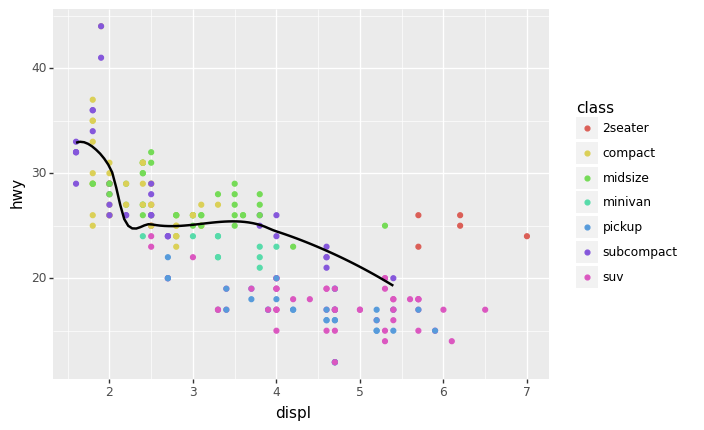

<ggplot: (8728650670740)>

In [10]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point(mapping=aes(color="class")) +\
geom_smooth(data=mpg.loc[mpg["class"] == "subcompact"], se=False)

## Попробуйте скомбинировать разные свойства разных слоёв

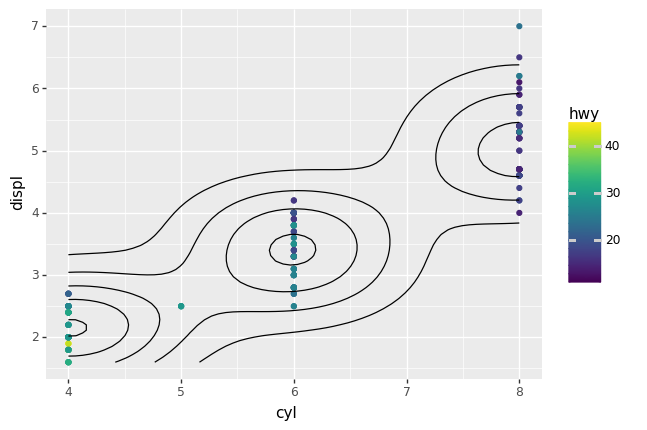

<ggplot: (8728644037355)>

In [18]:
ggplot(data=mpg, mapping=aes(x="cyl", y="displ")) + \
geom_point(mapping=aes(color="hwy")) + \
geom_density_2d()

# Какое геометрическое отображение вы будете использовать, чтобы нарисовать линейную диаграмму (обычный линейный график)?

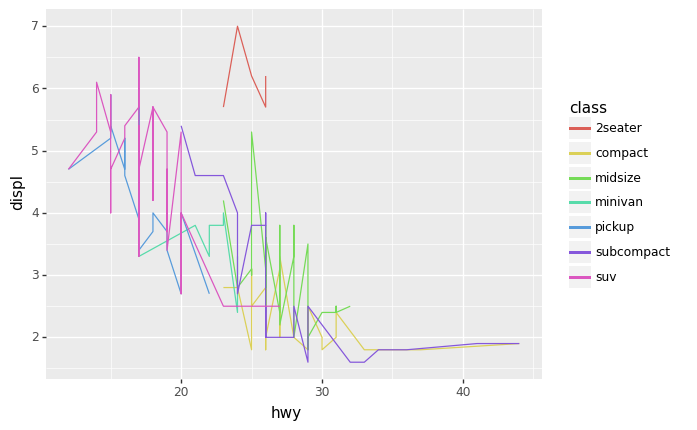

<ggplot: (8728644170009)>

In [14]:
ggplot(data=mpg, mapping=aes(y="displ", x="hwy")) +\
geom_line(mapping=aes(color="class"))

### Подберите подходящий код под следующие графики:
<img src="supp/p1.png" alt="Drawing" style="width: 350px;"/>
<img src="supp/p2.png" alt="Drawing" style="width: 350px;"/></br>
<img src="supp/p3.png" alt="Drawing" style="width: 350px;"/>
<img src="supp/p4.png" alt="Drawing" style="width: 350px;"/></br>
<img src="supp/p5.png" alt="Drawing" style="width: 350px;"/>
<img src="supp/p6.png" alt="Drawing" style="width: 350px;"/>

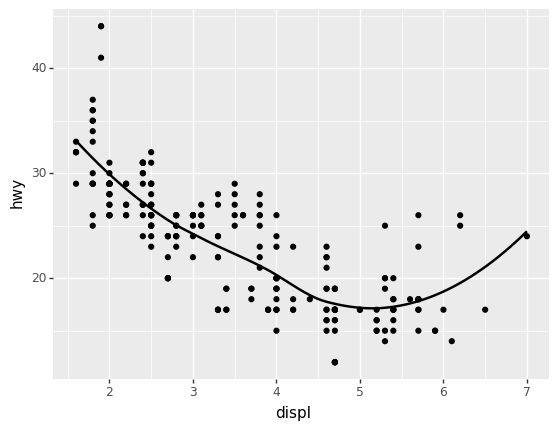

<ggplot: (8728643997510)>

In [19]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
geom_smooth(mapping=aes(x="displ", y="hwy"), se=False)

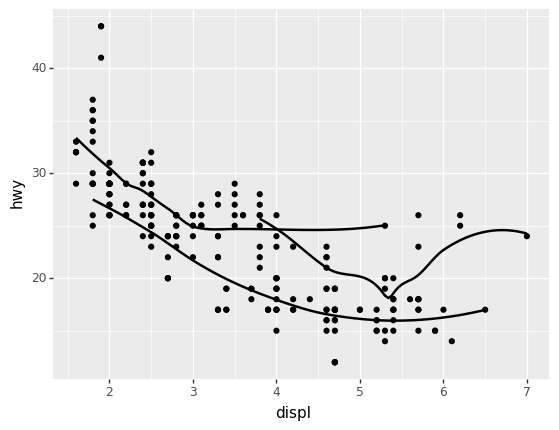

<ggplot: (8728644907069)>

In [20]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point() +\
geom_smooth(mapping=aes(group="drv"), se=False)

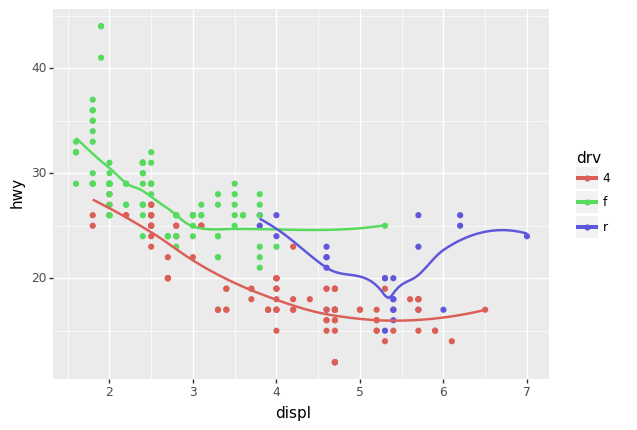

<ggplot: (8728643959787)>

In [21]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy", color="drv")) +\
geom_point() +\
geom_smooth(mapping=aes(), se=False)

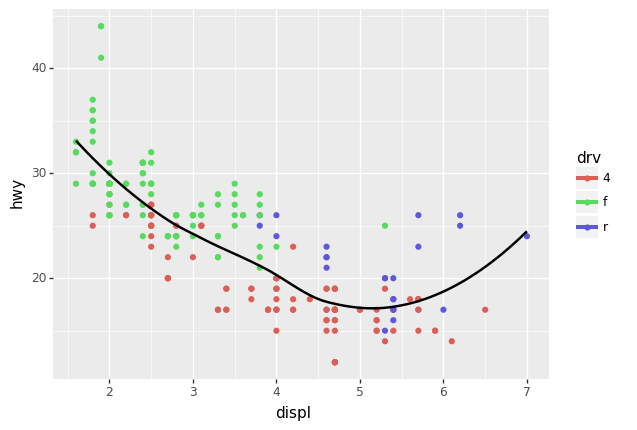

<ggplot: (8728646193228)>

In [28]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy", color="drv")) +\
geom_point() +\
geom_smooth(mapping=aes(x="displ", y="hwy", group=1), se=False)

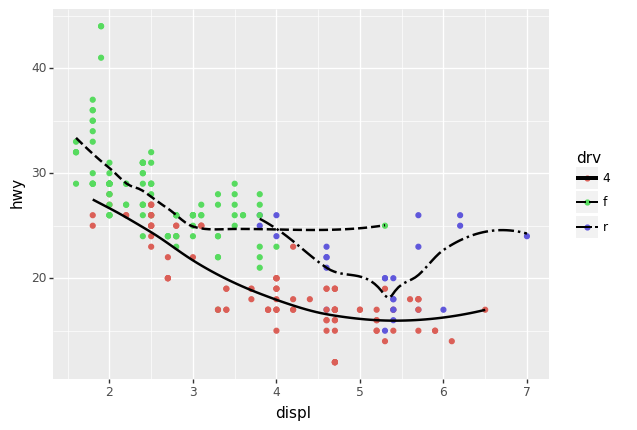

<ggplot: (8728643700218)>

In [39]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy", color="drv")) +\
geom_point() +\
geom_smooth(mapping=aes(linetype="drv"), color='black', se=False)

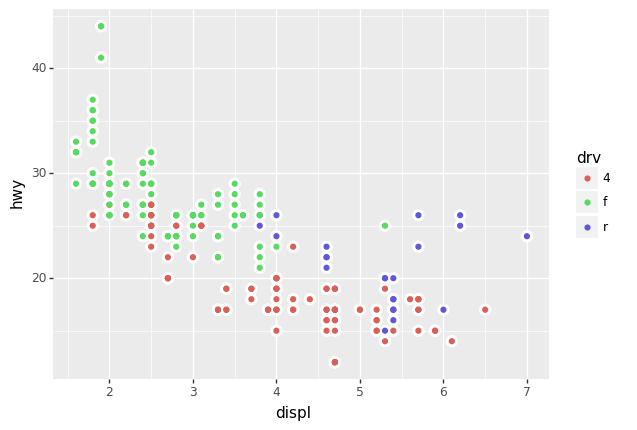

<ggplot: (8728644142294)>

In [24]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point(color="white", size=4) +\
geom_point(mapping=aes(color="drv"))

## Статистические свойства элементов категорий

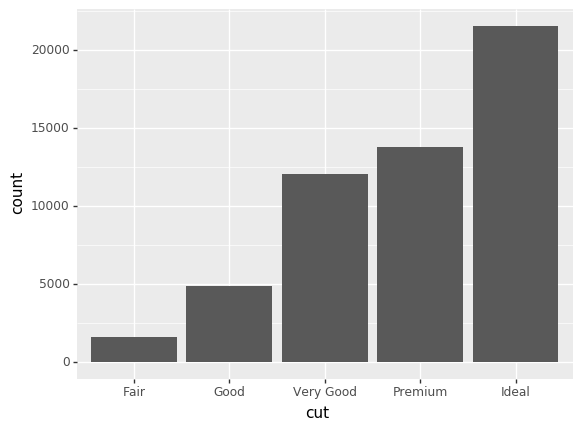

<ggplot: (-9223371871807217240)>

In [ ]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut"))

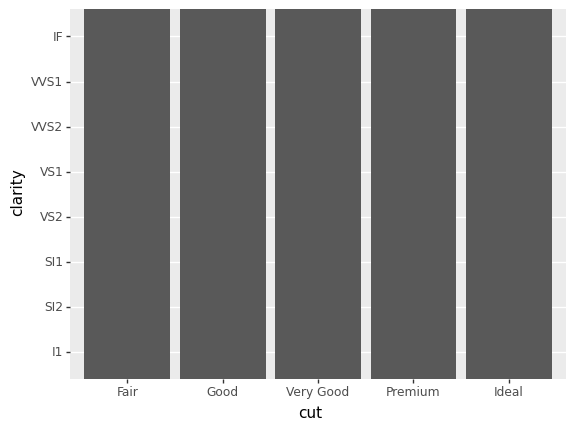

<ggplot: (8728643673206)>

In [40]:
ggplot(data=diamonds) +\
geom_col(mapping=aes(x="cut", y="clarity"))

### Что делает geom_col()? Чем он отличается от geom_bar()?
**Ответ**: geom_bar() отражает количество элеметов различных значений признака, а geom_col() отражает зависимость элементов между двумя признаками

### Что произойдёт, если 
'ggplot(data=diamonds) +\
'geom_bar(mapping=aes(x="cut", y="..prop.."), group=1)
или
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="color", y="..prop.."))
### запустить без "group=1"? Почему?
**Ответ**: group=1 учитывает пропорцию уровня (высоты) каждого столбика относительно всех уровней

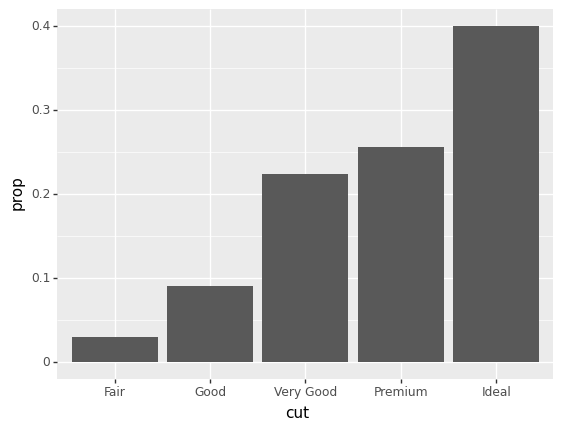

<ggplot: (8728643678477)>

In [42]:
ggplot(data=diamonds) + \
geom_bar(mapping=aes(x="cut", y="..prop.."), group=1)

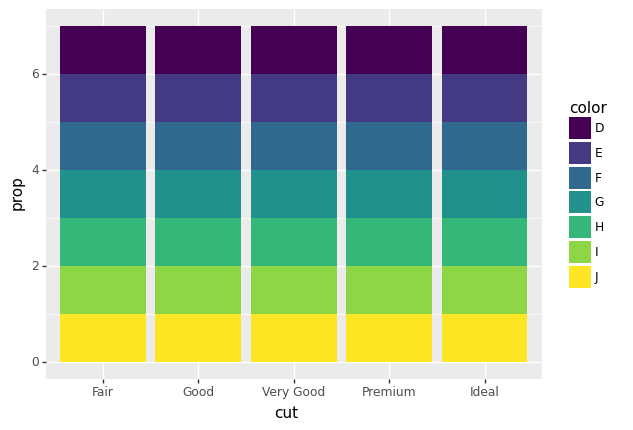

<ggplot: (8728643922399)>

In [46]:
ggplot(data=diamonds) + \
geom_bar(mapping=aes(x="cut", fill="color", y="..prop.."))

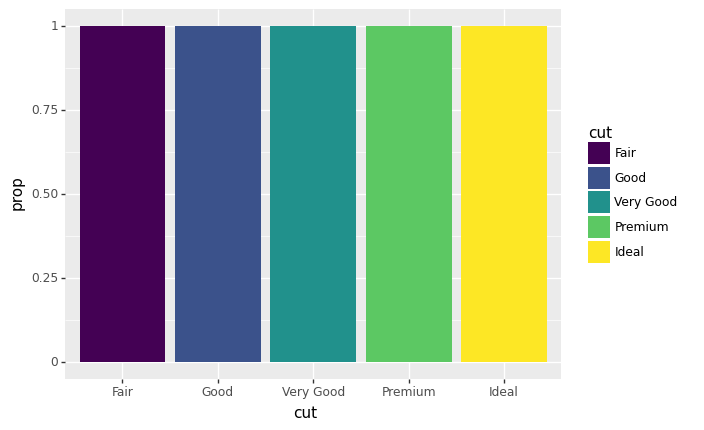

<ggplot: (8728646094605)>

In [53]:
ggplot(data=diamonds) + \
geom_bar(mapping=aes(x="cut", fill="cut", y="..prop.."),)

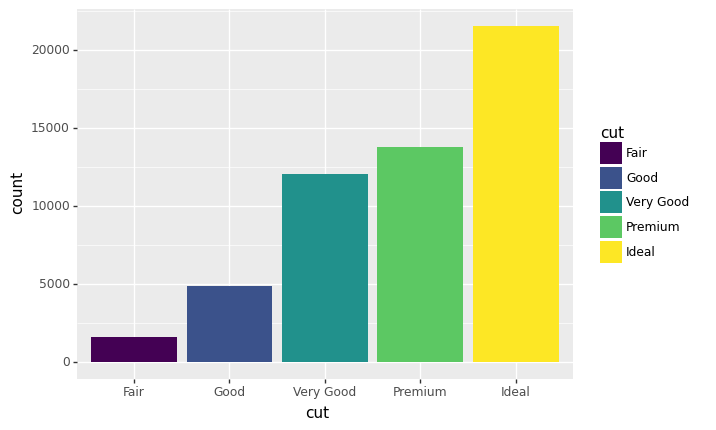

<ggplot: (8728646150952)>

In [54]:
ggplot(data=diamonds) + \
geom_bar(mapping=aes(x="cut", fill="cut"),)

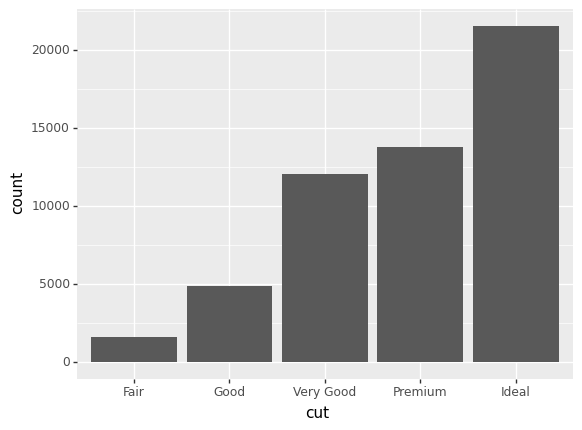

<ggplot: (8728644899663)>

In [55]:
ggplot(data=diamonds) + \
geom_bar(mapping=aes(x="cut", fill="cut"),group='cut')

## Модные графики с красивыми цветами

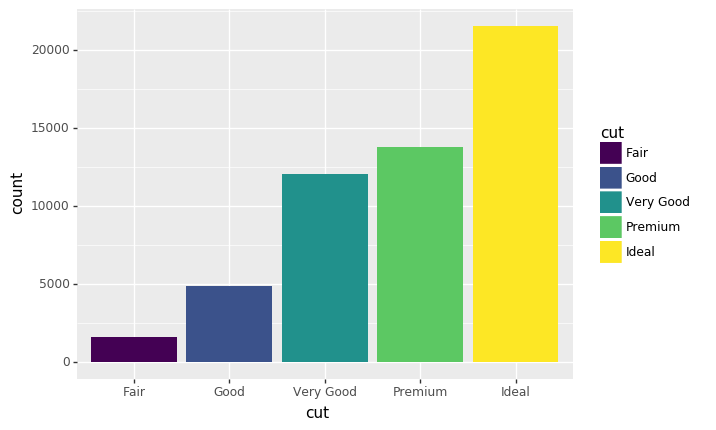

<ggplot: (-9223371871807233136)>

In [ ]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="cut"))

## При добавлении новых категорий в качестве цвета появляется новая функциональность

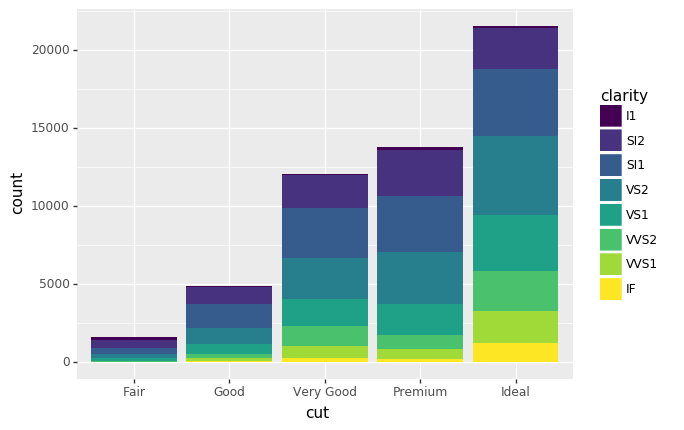

<ggplot: (-9223371871807213256)>

In [ ]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"))

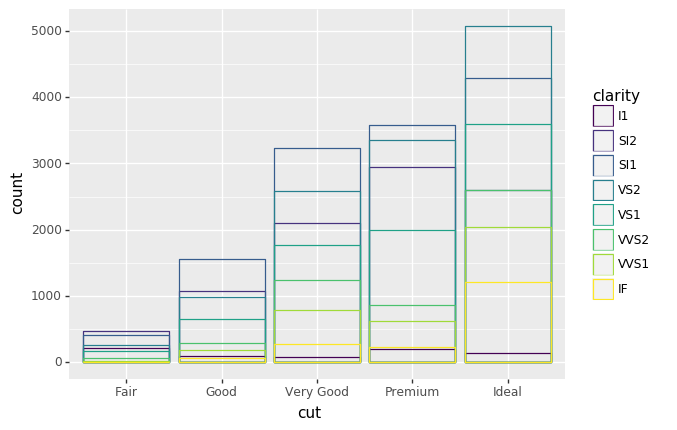

<ggplot: (-9223371871807570776)>

In [ ]:
ggplot(data=diamonds, mapping=aes(x="cut", colour="clarity")) +\
geom_bar(fill=None, position="identity")

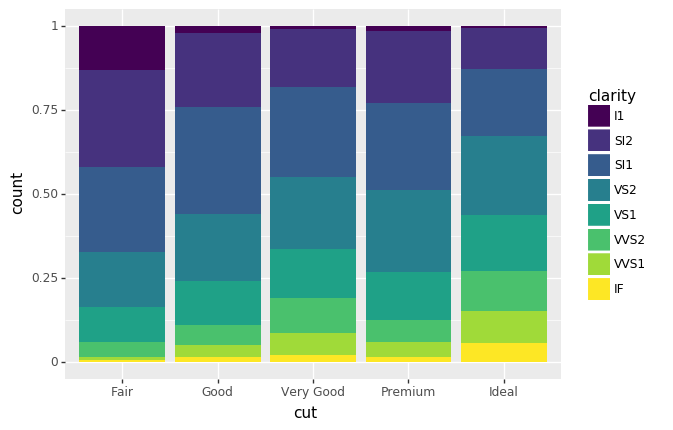

<ggplot: (-9223371871807389036)>

In [ ]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"), position="fill")

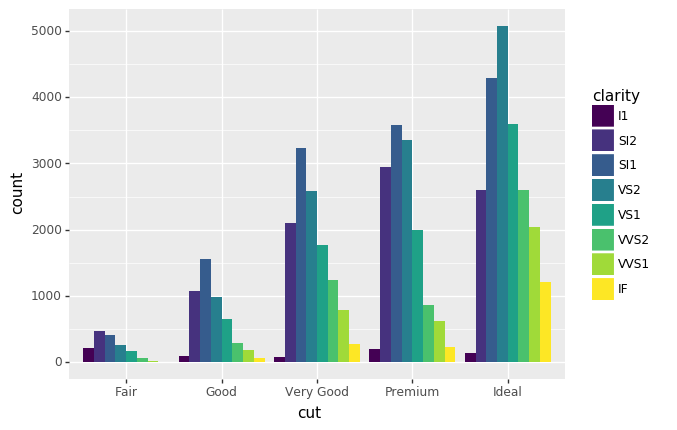

<ggplot: (-9223371871807689112)>

In [ ]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"), position="dodge")

## Добавим jitter в scatter!

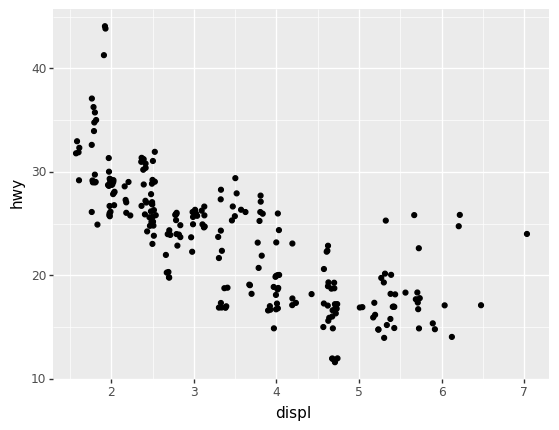

<ggplot: (-9223371871808166468)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"), position="jitter")


### Зачем тут coord_fixed()? Что делает geom_abline()?
**Ответ**: coord_fixed() - задает соотношение сторон для системы координат графика  
geom_abline() - рисует диагональную линию с заданным наклоном и сдвигом

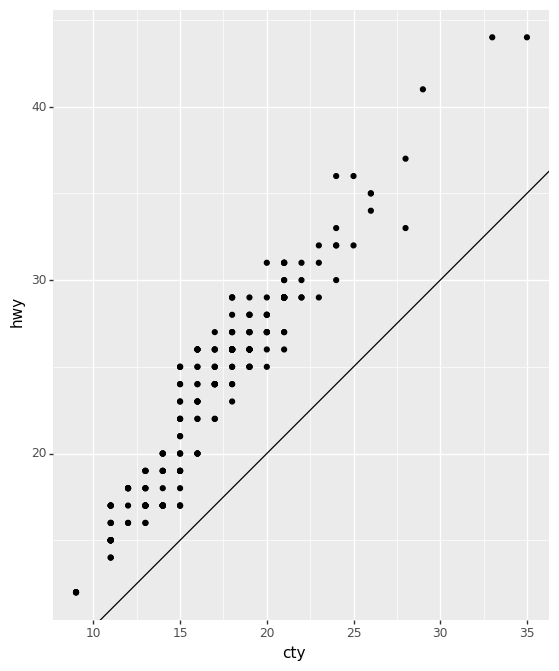

<ggplot: (8728643575815)>

In [56]:
ggplot(data=mpg, mapping=aes(x="cty", y="hwy")) +\
geom_point() +\
geom_abline() +\
coord_fixed()

# Творческое задание
Попробуйте использовать изученные средства plotnine для своего датасета (необязательно много и пока не надо строить сложные графики)

In [3]:
df = pd.read_csv('CustomerSegmentation.csv')

In [56]:
df.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

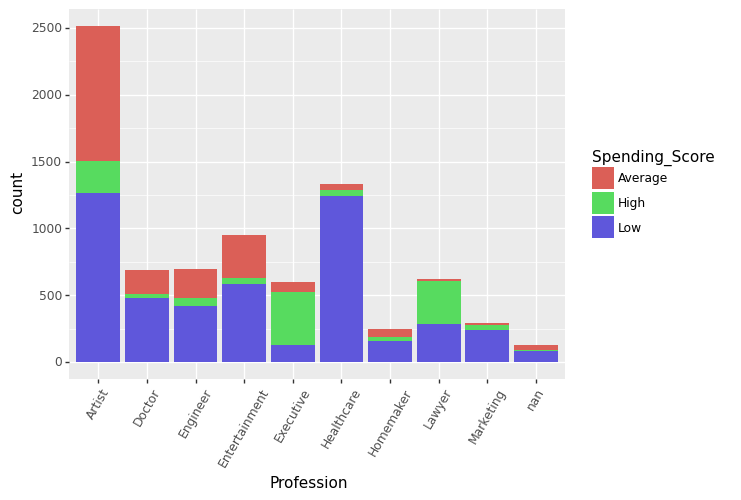

<ggplot: (98253990012)>

In [78]:
ggplot(data=df) +\
geom_bar(mapping=aes(x="Profession", fill="Spending_Score")) +\
theme(axis_text_x = element_text(angle=60))

C:\Users\Julia\AppData\Roaming\Python\Python310\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 335 rows containing missing values.


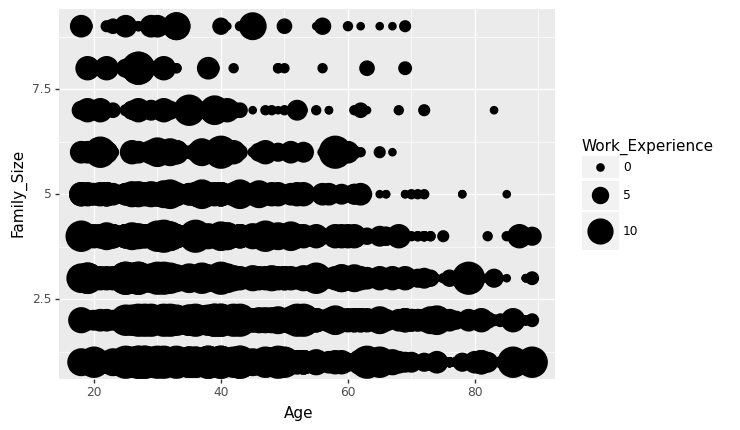

<ggplot: (98257528496)>

In [93]:
# Например, размер зависит от числового параметра, а цвет - от категориального
ggplot(data=df) +\
geom_point(mapping=aes(y="Family_Size", x="Age", stroke="Work_Experience",),)

C:\Users\Julia\AppData\Roaming\Python\Python310\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 1099 rows containing missing values.


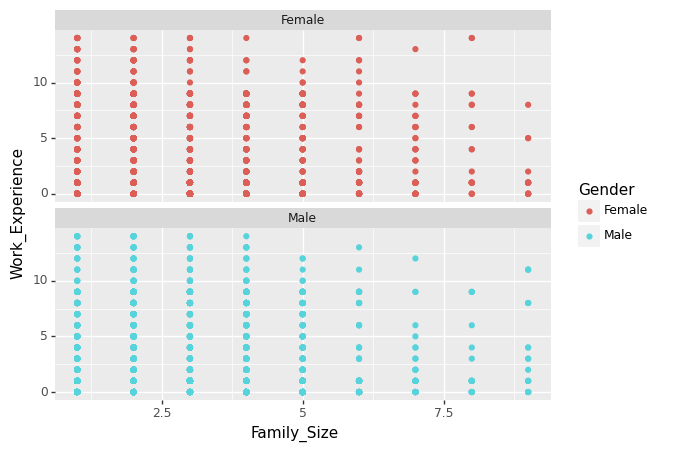

<ggplot: (91515801507)>

In [7]:
ggplot(data=df) +\
geom_point(mapping=aes(x="Family_Size", y="Work_Experience", color="Gender"))+\
facet_wrap("Gender", nrow=2)